<a href="https://colab.research.google.com/github/StacyMwende/-Week_4_IP_Autolib-network/blob/master/%22Moringa_Data_Science_Core_IP_Week4_2019_12_Stacy_Mwende_Python_Notebook%22_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autolib Electric car sharing Analysis

## 1.Introduction



## Defining the research question

The research problem is to investigate electric car usage (blue cars) during weekdays based on the Autolib dataset provided

The test hypothesis in this context is: Check whether there is a difference in the means of blue cars picked from two different postal codes during the weekdays

*Null hypothesis:* The number of Bluecars taken from postal code 75015 is the same as the number of cars taken from  in postal code 75017 during weekdays

(μ1=μ2)

*Alternative hypothesis:* The number of Bluecars taken from postal code 75015 is the not the same as the number of cars taken from  in postal code 75017 during weekdays

(μ1≠μ2)

Level of confidence = 95% or Significance level = 5%

## Metric For success

This study is considered successfull if the null hypothesis is true

## Context
We have been tasked to understand electric car usage by solving for another research question. 
We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made

## Dataset

The dataset and glossary to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset] 

The dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

## 2.Importing our Libraries



In [0]:
# importing numpy
import numpy as np
# importing pandas
import pandas as pd
# importing pandas profiling
import pandas_profiling as pp
# importing matplotlib
import matplotlib.pyplot as plt
# Importing Seaborn
import seaborn as sns
# importing math
import math
# importing stats
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 3.Loading the dataset



In [0]:
# Loading our dataset
# create a dataframe to better view the data
# 
autolib_df = pd.read_csv("autolib_daily_events.csv")
# Viewing topmost rows to get an understanding of the data
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
# Viewing the last rows of the dataset
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


## 4.Accessing Information about the dataset



In [0]:
# Getting information about the dataset
autolib_df.info()
# this gives us a general view of the dataset that there are 16085 rows and 13 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [0]:
# checking the different datatypes in the dataset
autolib_df.dtypes
# cleary shown that there are 11 integers and 2 strings

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [0]:
# performing a summary description of the dataset gives
autolib_df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [0]:
# Performing pandas profiling to get an detailed overview of the dataset
# 
pp.ProfileReport(autolib_df)

Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


## *Since our hypothesis is majorly for weekdays, we will filter out data to have data that concerns weekdays only*

In [0]:
# getting data for weekdays only
# 
autolib_df = autolib_df[autolib_df['day_type'] == 'weekday']
# 
autolib_df.shape
# We obsrve less rows compared to the original dataset which had 16085


(11544, 13)

## **5.Cleaning our dataset**

In [0]:
# Removing spaces from the dataset
autolib_df .columns = autolib_df.columns.str.strip().str.lower().str.replace('_','').str.replace('.','').str.replace(' ','')
autolib_df .head()


,postalcode,date,ndailydatapoints,dayofweek,daytype,bluecarstakensum,bluecarsreturnedsum,utilibtakensum,utilibreturnedsum,utilib14takensum,utilib14returnedsum,slotsfreedsum,slotstakensum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
# checking for null values
autolib_df .isnull().sum()
# there are no null variables hence the dataset is good for analysis

postalcode             0
date                   0
ndailydatapoints       0
dayofweek              0
daytype                0
bluecarstakensum       0
bluecarsreturnedsum    0
utilibtakensum         0
utilibreturnedsum      0
utilib14takensum       0
utilib14returnedsum    0
slotsfreedsum          0
slotstakensum          0
dtype: int64

In [0]:
## Since were only concerned with the bluecars only, we delete the columns that we dont read
autolib_df.drop(['utilibtakensum', 'utilibreturnedsum', 'utilib14takensum','utilib14returnedsum'], axis = 1, inplace = True)

# previewing formation after deleting accounts
autolib_df.head()

,postalcode,date,ndailydatapoints,dayofweek,daytype,bluecarstakensum,bluecarsreturnedsum,slotsfreedsum,slotstakensum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


## Descriptive analysis of the Blue cars columns

Here we do the measures of Central tendancy for both bluecarstakensum and bluecarsreturnedsum

In [0]:
# mean (bluecarstakensum )
autolib_df.bluecarstakensum.mean()


125.92695057506994

In [0]:
# median
autolib_df.bluecarstakensum.median()

46.0

In [0]:
# mode
autolib_df.bluecarstakensum.mode()

0    12
dtype: int64

In [0]:
# mean( bluecarsreturnedsum)
autolib_df.bluecarsreturnedsum.mean()

125.912713708424

In [0]:
# median
autolib_df.bluecarsreturnedsum.median()

46.0

In [0]:
# mode
autolib_df.bluecarsreturnedsum.mode()

0    13
dtype: int64

## Calculation of Standard Deviation, Variance, Kurtosis and Skewness

In [0]:
# Blue cars taken sum
print("The Standard Deviation: ",autolib_df.bluecarstakensum.std())
print("The Variance: ",autolib_df.bluecarstakensum.var())
print("The Kurtosis: ",autolib_df.bluecarstakensum.kurt())
print("The Skewness: ",autolib_df.bluecarstakensum.skew())
# 
# We observe that the kurtosis is greater than 3 which means that the data has heavier tails than a normal distribution

The Standard Deviation:  185.42657876727893
The Variance:  34383.01611333789
The Kurtosis:  6.172692305510042
The Skewness:  2.4063548974959086


In [0]:
# Blue cars returned sum
print("The Standard Deviation: ",autolib_df.bluecarsreturnedsum.std())
print("The Variance: ",autolib_df.bluecarsreturnedsum.var())
print("The Kurtosis: ",autolib_df.bluecarsreturnedsum.kurt())
print("The Skewness: ",autolib_df.bluecarsreturnedsum.skew())
# 
#  We observe that the kurtosis is greater than 3 which means that the data has heavier tails than a normal distribution

The Standard Deviation:  185.50153480148427
The Variance:  34410.819413706275
The Kurtosis:  6.1862880957582345
The Skewness:  2.412084978838923


## **6.Univariate analysis**

In [0]:
# Converting the day of week from from numericals to strings for plotting
# Using the mapping function
#
autolib_df['dayofweek'] = autolib_df.dayofweek.map({0: 'Monday', 1: 
                                          'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})
# Confirming that our dataset day_type columns was successfully converted
autolib_df.head()
# clearly seen that the days have been coverted

,postalcode,date,ndailydatapoints,dayofweek,daytype,bluecarstakensum,bluecarsreturnedsum,slotsfreedsum,slotstakensum
0,75001,1/1/2018,1440,Monday,weekday,110,103,22,20
1,75001,1/2/2018,1438,Tuesday,weekday,98,94,23,22
2,75001,1/3/2018,1439,Wednesday,weekday,138,139,27,27
3,75001,1/4/2018,1320,Thursday,weekday,104,104,25,21
4,75001,1/5/2018,1440,Friday,weekday,114,117,18,20


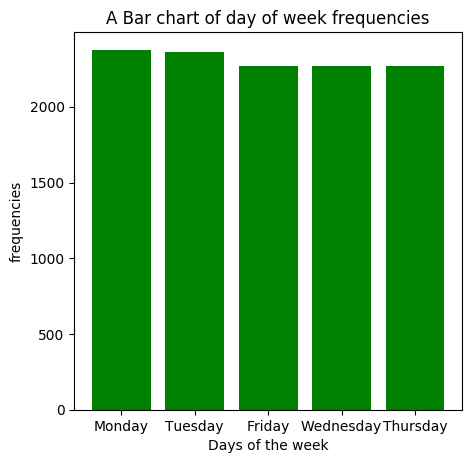

In [0]:
# Plotting a bar plot of the day of week categories 
# using a copy of the dataset
# df = autolib_iqr
# 
day = autolib_df.dayofweek.value_counts()
day
# accessing the data to plot
# labels
sizes= day.index
sizes

# values
data = day.values
data

plt.figure(figsize = (5,5), dpi = 100)
plt.bar(sizes, data, color = 'green')
plt.ylabel("frequencies")
plt.xlabel('Days of the week')
plt.title("A Bar chart of day of week frequencies", color = 'black')
plt.show()
# shown that Monday and tuesday top in business and goes down as the week goes on

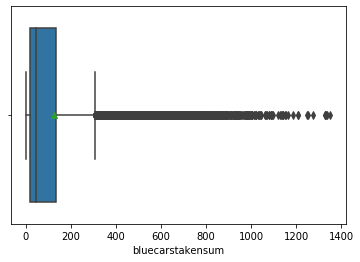

In [0]:
# Visualize the bluecarstakensum 
# 
sns.boxplot(autolib_df['bluecarstakensum'],showmeans = True)
# 
# shows a couple of outliers in the dataset.
# To be sure, we use the IQR method to confirm


In [0]:
# checking for outliers using the IQR range
# 
Q1 = autolib_df.bluecarstakensum.quantile(0.25)
Q3 = autolib_df.bluecarstakensum.quantile(0.75)

IQR = Q3 - Q1

outliers = ((autolib_df.bluecarstakensum < Q1 - 1.5 * IQR) | (autolib_df.bluecarstakensum > Q3 + 1.5 * IQR))
outliers.value_counts()
# We observe that there are 2215 outliers but we choose not to delete the outliers

False    13870
True      2215
Name: bluecarstakensum, dtype: int64

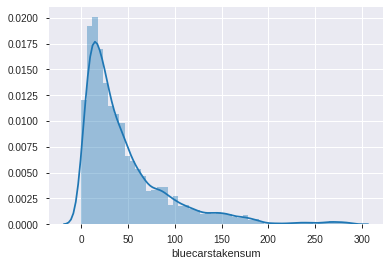

In [0]:
# Plotting a histogram to view te total sum of cars taken
# 
sns.distplot(df.bluecarstakensum, kde = True)
# We see that te curve is not nromally distributed but it is skewed to the right side of the curve
# In this case, most data is concentrated towards the tail side

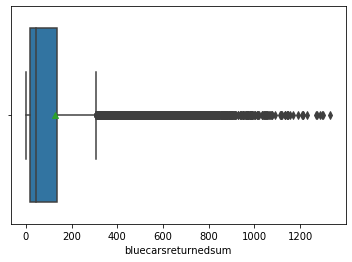

In [0]:
# We also visualize the blue cars returned sum column
# 
sns.boxplot(autolib_df['bluecarsreturnedsum'],showmeans = True)
# The boxplot shows that there are outliers which we will confirm using the inter quartlie range just to be sure

In [0]:
# performing the inter quartlie range to check for outliers
# 
Q1 = autolib_df.bluecarsreturnedsum.quantile(0.25)
Q3 = autolib_df.bluecarsreturnedsum.quantile(0.75)

IQR = Q3 - Q1

outliers = ((autolib_df.bluecarsreturnedsum < Q1 - 1.5 * IQR) | (autolib_df.bluecarsreturnedsum > Q3 + 1.5 * IQR))
outliers.value_counts()

False    13872
True      2213
Name: bluecarsreturnedsum, dtype: int64

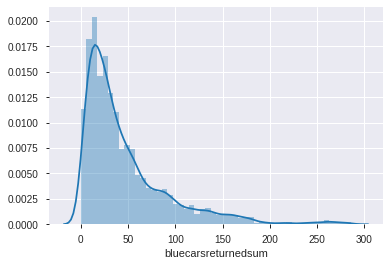

In [0]:
# Historgram on the sum of blue cars returned
# 
sns.distplot(df.bluecarsreturnedsum, kde = True)
# we also see that data is not normally distributed and hence it has a right tail where data is more concentrated as you move
# to the right side of the tail

## **7.Bivariate Analysis**

Consider 2 numerical variables

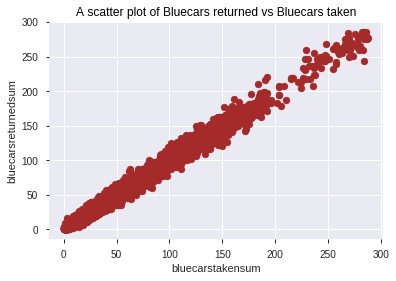

In [0]:
# Here we plot a scatterplot to visualize the 2 numerical variables
# plt.figure(dpi = 100)
plt.scatter(df['bluecarstakensum'], df['bluecarsreturnedsum'], color = 'brown')
plt.title('A scatter plot of Bluecars returned vs Bluecars taken', color = 'black')
plt.xlabel('bluecarstakensum')
plt.ylabel('bluecarsreturnedsum')
plt.show()
# 
# From the plot below, there's a high linear colinearity between the blue cars taken sum and bluecarsretund

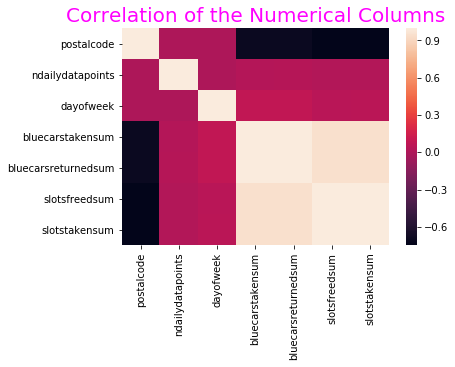

In [0]:
# Checking the correlation between the variables using a heat map

coeff = autolib_df.corr()

plt.figure()
sns.heatmap(coeff, xticklabels=coeff.columns, yticklabels=coeff.columns)
plt.title('Correlation of the Numerical Columns', color = 'magenta', fontsize = 20)
plt.show()
# we observe a ahigh correlation between the numerical variables in the dataset

## 8.Hypothesis Testing



Hypothesis testing is a test used to determine whether the hypothesis assumed for the sample of data stands true for the entire population or not.

For our hypothesis, We use z-score as out test statistic.
Here we test whether the Null hypothesis is true or the alternative is true based on the calculations we well make

## 9.Sampling

For analysis, I choose to use a sample of 900 using Simple random sampling method.

I chose to use Simple random sampling because of it's simplicity and the fact that it lacks bias

Confidence level = 95%

In [81]:
# Taking a sample from the autolib dataset through SRS
# 
autolib_df_sample = autolib_df.sample(n=1050,replace='False')
print(autolib_df_sample)

       postalcode       date  ...  slotsfreedsum slotstakensum
1633        75011  3/18/2018  ...            157           161
16020       95880   4/5/2018  ...              0             0
12269       93440  3/26/2018  ...              0             0
108         75001  4/22/2018  ...             22            21
5419        92150   5/2/2018  ...              7             7
...           ...        ...  ...            ...           ...
14183       94160  5/20/2018  ...              4             5
11280       93300  4/15/2018  ...              0             0
13862       94140  4/30/2018  ...              0             0
8398        92360   6/8/2018  ...              0             0
2169        75014   6/5/2018  ...            139           138

[1050 rows x 9 columns]


In [82]:
# To understand the mean of the blue cars from our sample,
print(autolib_df_sample.bluecarstakensum.mean())
# 
# There is a change in the mean compared to the previous mean of the whole dataset which was 125.92695057506994

127.21714285714286


In [0]:
# checking the mean of returned cars
print(autolib_df_sample.bluecarsreturnedsum.mean())
# there is also a change in the mean of the returned cars which was 125.912713708424

130.29714285714286


In [83]:
# getting the standard deviation of the blue cars taken sum
# 
autolib_df_sample.bluecarstakensum.std()

184.76189941936912

In [0]:
# Getting data from our desired postal codes, starting with 75015
# 
 df_75015 =autolib_df_sample[(autolib_df_sample.postalcode == 75015)]
 df_75015.head()

,postalcode,date,ndailydatapoints,dayofweek,daytype,bluecarstakensum,bluecarsreturnedsum,slotsfreedsum,slotstakensum
2274,75015,4/4/2018,1440,Wednesday,weekday,926,893,225,219
2189,75015,1/6/2018,1437,NaN,weekend,1061,1015,253,245
2229,75015,2/15/2018,1437,Thursday,weekday,872,862,263,260
2228,75015,2/14/2018,1440,Wednesday,weekday,874,874,248,248
2258,75015,3/19/2018,1440,Monday,weekday,746,780,221,230


In [74]:
# Getting data from our desired postal codes, starting with 75017
# 
 df_75017 = autolib_df_sample[(autolib_df_sample.postalcode == 75017)]
 df_75017.head()

,postalcode,date,ndailydatapoints,dayofweek,daytype,bluecarstakensum,bluecarsreturnedsum,slotsfreedsum,slotstakensum
2497,75017,1/2/2018,1438,Tuesday,weekday,548,542,125,126
2605,75017,4/23/2018,1417,Monday,weekday,594,554,158,153
2642,75017,6/10/2018,1440,NaN,weekend,829,883,223,230
2584,75017,4/2/2018,1439,Monday,weekday,713,757,179,185
2599,75017,4/17/2018,1440,Tuesday,weekday,635,595,148,147


Mean of the population is 125.9270

Mean of the sample is 127.2171

Sample size is 1050

Standard devaition of the sample is 184.7619

Confidence interval is 95%



In [87]:
# calculating z_score to get p_value
from scipy import stats 
# 
sample_size = 1050
pop_mean = 125.9270
sample_mean = 127.2171
# zscore = (sample_mean - pop_mean) 
z_score = (127.2171 - 125.9270) / ( 184.7619 / (math.sqrt(1050)))
z_score

0.22625886546457766

z_score = 0.2263

p_value = 0.821046.

level of significance = 0.05

p_value > 0.05

From the analysis, we see that the p_value is greater than 0.05 which means that we *fail to reject the Null hypothesis*

Hence, we keep the calim that the number of Bluecars taken from postal code 75015 is the same as the number of cars taken from in postal code 75017 during weekdays

(μ1=μ2)